In [182]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np

# Pandas数据结构

Pandas的两种数据类型：Series、DataFrame，与Numpy数组的关系？

## 创建Series数据

In [5]:
obj = Series([1, -2, 3, -4])  #pd.Series()  #Series由数据和索引构成   #自动生成索引
obj

0    1
1   -2
2    3
3   -4
dtype: int64

In [11]:
obj2 = Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])  #自定义索引
obj2

a    1
b   -2
c    3
d   -4
dtype: int64

In [6]:
obj2.values   #Numpy类型

array([ 1, -2,  3, -4], dtype=int64)

In [7]:
obj2.index  #Index类型

Index(['a', 'b', 'c', 'd'], dtype='object')

Series具有索引对象

In [8]:
obj2['b']  #索引只获得单个值，而切片的结果还是Series类型

-2

In [10]:
obj2['c'] = 23
obj2[['c', 'd']]

c    23
d    -4
dtype: int64

数据和索引之间一一对应，类似字典，在运算的时候也会保留

In [12]:
obj2

a    1
b   -2
c    3
d   -4
dtype: int64

In [13]:
obj2<0

a    False
b     True
c    False
d     True
dtype: bool

In [12]:
obj2[obj2 < 0 ]

b   -2
d   -4
dtype: int64

In [13]:
obj2 * 2

a     2
b    -4
c    46
d    -8
dtype: int64

In [16]:
import numpy as np

In [18]:
np.abs(obj2)

a     1
b     2
c    23
d     4
dtype: int64

Series创建方式：

In [53]:
obj = Series(10,index=['a','b'])   #由标量创建    #错误：obj = Series([10],index=['a','b']) 
obj

a    10
b    10
dtype: int64

In [14]:
data = {
    '张三':92,
    '李四':78,
    '王五':68,
    '小明':82    
}

In [21]:
obj3 = Series(data)   #由字典创建，字典无序，Series也无序
obj3

小明    82
张三    92
李四    78
王五    68
dtype: int64

In [16]:
names = ['张三', '李四', '王五', '小明']
obj4 = Series(data, index=names)   #人为指定顺序
obj4

张三    92
李四    78
王五    68
小明    82
dtype: int64

In [21]:
obj4.name = 'math'  #数据的名字
obj4.index.name = 'students'   #索引的名字

In [18]:
obj4

students
张三    92
李四    78
王五    68
小明    82
Name: math, dtype: int64

## DataFrame数据创建

DataFrame的创建有几种方式：

In [23]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [24]:
#二维数组创建，自动生成行索引和列索引
DataFrame(np.arange(10).reshape(2,5))

0  1  2  3  4
0  0  1  2  3  4
1  5  6  7  8  9

In [56]:
#字典创建，注意字典的数据格式：字典的值是数组、列表或元组
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'year':[2001, 2001, 2003, 2002],
    'city':['北京', '上海', '广州', '北京']
}
df = DataFrame(data)
df    #注意生成的DataFrame的列索引和原始字典中键、值的关系

name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2003   广州
3   小明    male  2002   北京

In [57]:
df = DataFrame(data, columns=['name', 'sex', 'year', 'city'])  #指定列索引顺序
df

name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2003   广州
3   小明    male  2002   北京

In [32]:
df = DataFrame(data, columns=['name', 'sex', 'year', 'city'],index=['a', 'b', 'c', 'd'])  #指定行索引和列索引
df

name     sex  year city
a   张三  female  2001   北京
b   李四  female  2001   上海
c   王五    male  2003   广州
d   小明    male  2002   北京

In [5]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
df.columns

Index(['name', 'sex', 'year', 'city'], dtype='object')

DataFrame的索引可以由用户给定，也可以自动生成

In [27]:
#嵌套字典创建
data2 = {
    'sex':{'张三':'female','李四':'female','王五':'male'},
    'city':{'张三':'北京','李四':'上海','王五':'广州'}
}
df2 = DataFrame(data2)
df2

sex city
张三  female   北京
李四  female   上海
王五    male   广州

In [33]:
df.index.name = 'id'
df.columns.name = 'std_info'

In [34]:
df

std_info name     sex  year city
id                              
a          张三  female  2001   北京
b          李四  female  2001   上海
c          王五    male  2003   广州
d          小明    male  2002   北京

In [35]:
#DataFrame的数据转换为二维数组
df.values

array([['张三', 'female', 2001, '北京'],
       ['李四', 'female', 2001, '上海'],
       ['王五', 'male', 2003, '广州'],
       ['小明', 'male', 2002, '北京']], dtype=object)

### 索引对象

In [10]:
obj = Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [11]:
obj.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [12]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object', name='id')

In [13]:
df.columns

Index(['name', 'sex', 'year', 'city'], dtype='object', name='std_info')

In [14]:
#索引对象不可以修改
index = obj.index
index[1] = 'f'

TypeError: Index does not support mutable operations

In [36]:
df

std_info name     sex  year city
id                              
a          张三  female  2001   北京
b          李四  female  2001   上海
c          王五    male  2003   广州
d          小明    male  2002   北京

In [16]:
# 索引对象也是一个集合，因此也可以用in操作符
'sex' in df.columns

True

In [17]:
'f' in df.index

False

# Pandas索引操作

## 重新索引

In [20]:
obj = Series([1, -2, 3, -4], index=['b', 'a', 'c', 'd'])
obj

b    1
a   -2
c    3
d   -4
dtype: int64

In [21]:
#重新索引就是重新排序
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -2.0
b    1.0
c    3.0
d   -4.0
e    NaN
dtype: float64

In [59]:
obj = Series([1, -2, 3, -4], index=[0,2,3,5])
obj

0    1
2   -2
3    3
5   -4
dtype: int64

In [61]:
#method参数指定缺失值填充方式
obj2 = obj.reindex(range(6),method='ffill')
obj2

0    1
1    1
2   -2
3    3
4    3
5   -4
dtype: int64

In [63]:
df = DataFrame(np.arange(9).reshape(3,3),index=['a','c','d'],columns=['name','id','sex'])
df

name  id  sex
a     0   1    2
c     3   4    5
d     6   7    8

In [74]:
df2 = df.reindex(['a', 'b', 'c', 'd'])
df2

name   id  sex
a   0.0  1.0  2.0
b   NaN  NaN  NaN
c   3.0  4.0  5.0
d   6.0  7.0  8.0

In [75]:
#fill_value指定缺失值填充的值
df3 = df2.reindex(columns=['name', 'year', 'id'], fill_value=0)
df3

name  year   id
a   0.0     0  1.0
b   NaN     0  NaN
c   3.0     0  4.0
d   6.0     0  7.0

## 更换索引

set_index()将列数据作为行索引。

In [41]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'year':[2001, 2001, 2003, 2002],
    'city':['北京', '上海', '广州', '北京']
}
df = DataFrame(data)
df  

name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2003   广州
3   小明    male  2002   北京

In [43]:
df2 = df.set_index('name')   #注意，不改变df
df2

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

reset_index()将索引作为数据列，与set_index()方法相反

In [46]:
df3 = df2.reset_index()  #也不改变df2
df3

name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2003   广州
3   小明    male  2002   北京

In [47]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'grade':[68, 78, 63, 92]
}
df = DataFrame(data)
df

name  grade
0   张三     68
1   李四     78
2   王五     63
3   小明     92

In [50]:
#sort_value方法排序不改变原DataFrame，排序之后索引会改变，与Excel不同
df2 = df.sort_values(by='grade')
df2

name  grade
2   王五     63
0   张三     68
1   李四     78
3   小明     92

In [51]:
df3 = df2.reset_index()  #reset_index之后，原来的列索引被添加为一列，用drop=True去除原索引
df3

index  grade name
0      2     63   王五
1      0     68   张三
2      1     78   李四
3      3     92   小明

In [52]:
df4 = df2.reset_index(drop=True)
df4

grade name
0     63   王五
1     68   张三
2     78   李四
3     92   小明

# 索引和选取

In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

Series类型的索引与列表的索引类似

In [3]:
obj = Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [4]:
obj[1]  #可以通过0-(n-1)索引

-2

In [5]:
obj['b']  #也可以通过设置的索引标签来索引

-2

In [6]:
obj[['a','c']]

a    1
c    3
dtype: int64

In [7]:
obj[0:2]

a    1
b   -2
dtype: int64

In [8]:
obj['a':'c']  #利用索引标签索引时，尾端是被包含的

a    1
b   -2
c    3
dtype: int64

DataFrame的行和列选取都有具体的方法

选取列：列索引标签或属性形式

In [2]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'year':[2001, 2001, 2003, 2002],
    'city':['北京', '上海', '广州', '北京']
}
df = DataFrame(data)
df

name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2003   广州
3   小明    male  2002   北京

In [3]:
df['city']  #以列索引标签形式，返回Series结构

0    北京
1    上海
2    广州
3    北京
Name: city, dtype: object

In [42]:
df[['city']]

city
0   北京
1   上海
2   广州
3   北京

In [18]:
df.name   #以属性方式

0    张三
1    李四
2    王五
3    小明
Name: name, dtype: object

In [20]:
df[['city','sex']]

city     sex
0   北京  female
1   上海  female
2   广州    male
3   北京    male

In [45]:
df[['sex':'city']]

SyntaxError: invalid syntax (<ipython-input-45-d6386b7eaceb>, line 1)

<font color='red'>直接选取列时不能使用切片，</font>也没有位置

In [3]:
df2 = df.set_index('name')
df2

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

In [30]:
df.iloc[:3]

name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2003   广州

In [49]:
df2[1:3]

sex  year city
name                   
李四    female  2001   上海
王五      male  2003   广州

In [140]:
df2[0:2]  #以索引位置方式，注意，必须“切片”

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海

In [84]:
df2['李四':'小明']  #以行索引标签方式

sex  year city
name                   
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

<font color='red'>不用loc或iloc，选取行时必须用“切片”方式，选取列时不能使用“切片”。</font>

选取行：行位置或行索引标签(loc()或iloc()方法)

loc和iloc可以切片，也可以不切片。loc: locat, iloc:i-integer

loc取行数据，不用指定列

In [4]:
df2

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

In [149]:
df2.loc['张三']   #按行索引标签选取数据。注意，不能使用df2['张三']

sex     female
year      2001
city        北京
Name: 张三, dtype: object

In [88]:
type(df2.loc['张三'])

pandas.core.series.Series

In [90]:
df2.loc[['张三']]  #两对[]，里面的[]有“组合”的含义

sex  year city
name                   
张三    female  2001   北京

In [87]:
type(df2.loc[['张三']])

pandas.core.frame.DataFrame

In [111]:
df2.loc[['张三','王五']]  #“张三”和“王五”的组合

sex  year city
name                   
张三    female  2001   北京
王五      male  2003   广州

In [153]:
df2.loc[['张三':'王五']]  #出错，不能用切片来“组合”

SyntaxError: invalid syntax (<ipython-input-153-e34357cebaa9>, line 1)

In [5]:
df2.loc['张三':'王五']  #包含尾端

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州

iloc取行数据，与loc的用法类似

In [104]:
df2

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

In [35]:
df2.iloc[1]  #按行索引位置获取数据

city        上海
sex     female
year      2001
Name: 李四, dtype: object

In [115]:
df2.iloc[[2]]

sex  year city
name                 
王五    male  2003   广州

In [114]:
df2.iloc[[2,3]]

sex  year city
name                 
王五    male  2003   广州
小明    male  2002   北京

In [117]:
df2.iloc[1:3]   #不包含尾端

sex  year city
name                   
李四    female  2001   上海
王五      male  2003   广州

loc选取列数据，要指定行，联想Numpy

In [6]:
df2

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

In [186]:
df2.loc[:,'city']

name
张三    北京
李四    上海
王五    广州
小明    北京
Name: city, dtype: object

In [125]:
df2.loc[['张三','李四'],['sex','city']]  

sex city
name             
张三    female   北京
李四    female   上海

In [130]:
df2.loc['张三':'王五','sex':'city']

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州

In [155]:
df2.loc['张三':'王五',['sex','city']]  #内部用[]表示组合，用:表示切片（不要[]）

sex city
name             
张三    female   北京
李四    female   上海
王五      male   广州

In [154]:
df2.loc[:,['sex':'city']]

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

iloc取列数据，也要指定行，列也有“序号”了

In [160]:
df2

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

In [189]:
df2.iloc[:,1]

name
张三    2001
李四    2001
王五    2003
小明    2002
Name: year, dtype: int64

In [190]:
df2.iloc[:,[1]]

year
name      
张三    2001
李四    2001
王五    2003
小明    2002

In [126]:
df2.iloc[[1,2],[1,2]]

year city
name           
李四    2001   上海
王五    2003   广州

In [164]:
df2.iloc[1:3,0:2] #不包含尾端

sex  year
name              
李四    female  2001
王五      male  2003

<font color='red'>
    <ul>
        <li>不用loc或iloc，选取行时必须用“切片”方式，选取列时不能使用“切片”。</li>
        <li>用loc或iloc，可以切片，也可以不切片。</li>
        <li>用loc或iloc切片时，位置切片不包括尾端，名称切片包含尾端。</li>
        <li>用loc或iloc，取行数据不用指定列，选取列数据要指定行。</li>
    </ul>
</font>

#### 布尔选择

In [7]:
df2

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海
王五      male  2003   广州
小明      male  2002   北京

In [177]:
df2['sex'] == 'female'

name
张三     True
李四     True
王五    False
小明    False
Name: sex, dtype: bool

In [14]:
df2[df2['sex'] == 'female']

sex  year city
name                   
张三    female  2001   北京
李四    female  2001   上海

In [48]:
df2[(df2['sex'] == 'female') & (df2['city'] == '北京')]

city     sex  year
name                   
张三     北京  female  2001

# 行和列的操作

append()方法增加一行，字典结构

In [15]:
df

name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2003   广州
3   小明    male  2002   北京

In [16]:
new_data = {
    'city':'武汉',
    'name':'小李',
    'sex':'male',
    'year':2002
}

In [20]:
df = df.append(new_data,ignore_index=True)  #忽略索引值
df

name     sex  year city
0   张三  female  2001   北京
1   李四  female  2001   上海
2   王五    male  2003   广州
3   小明    male  2002   北京
4   小李    male  2002   武汉
5   小李    male  2002   武汉

直接赋值来增加一列

In [21]:
df['class'] = 2018
df

name     sex  year city  class
0   张三  female  2001   北京   2018
1   李四  female  2001   上海   2018
2   王五    male  2003   广州   2018
3   小明    male  2002   北京   2018
4   小李    male  2002   武汉   2018
5   小李    male  2002   武汉   2018

In [23]:
df['math'] = [92,78,58,69,82,90]
df

name     sex  year city  class  math
0   张三  female  2001   北京   2018    92
1   李四  female  2001   上海   2018    78
2   王五    male  2003   广州   2018    58
3   小明    male  2002   北京   2018    69
4   小李    male  2002   武汉   2018    82
5   小李    male  2002   武汉   2018    90

drop()方法删除

In [25]:
new_df = df.drop(2)  #删除行，不改变原DataFrame，如何改变？
new_df

name     sex  year city  class  math
0   张三  female  2001   北京   2018    92
1   李四  female  2001   上海   2018    78
3   小明    male  2002   北京   2018    69
4   小李    male  2002   武汉   2018    82
5   小李    male  2002   武汉   2018    90

In [26]:
new_df = new_df.drop('class',axis=1)  #删除列
new_df

name     sex  year city  math
0   张三  female  2001   北京    92
1   李四  female  2001   上海    78
3   小明    male  2002   北京    69
4   小李    male  2002   武汉    82
5   小李    male  2002   武汉    90

rename()方法修改行和列的索引

In [31]:
new_df

name     sex  year city  Math
0   张三  female  2001   北京    92
1   李四  female  2001   上海    78
2   小明    male  2002   北京    69
2   小李    male  2002   武汉    82
3   小李    male  2002   武汉    90

In [32]:
new_df.rename(index={2:6},inplace=True)  #inplace可在原数据上修改
new_df

name     sex  year city  Math
0   张三  female  2001   北京    92
1   李四  female  2001   上海    78
6   小明    male  2002   北京    69
6   小李    male  2002   武汉    82
3   小李    male  2002   武汉    90

In [30]:
new_df.rename(index={2:6},columns={'math':'Math'},inplace=True)  #inplace可在原数据上修改
new_df
#new_df.set_index(range(5))

name     sex  year city  Math
0   张三  female  2001   北京    92
1   李四  female  2001   上海    78
2   小明    male  2002   北京    69
2   小李    male  2002   武汉    82
3   小李    male  2002   武汉    90

In [244]:
#DataFrame的值如何修改？

# pandas数据运算

“数据对齐”

In [67]:
obj1 = Series([3.2,5.3,-4.4,-3.7],index=['a','c','g','f'])
obj1

a    3.2
c    5.3
g   -4.4
f   -3.7
dtype: float64

In [68]:
obj2 = Series([5.0,-2,4.4,3.4],index=['a','b','c','d'])
obj2

a    5.0
b   -2.0
c    4.4
d    3.4
dtype: float64

In [69]:
obj1 + obj2

a    8.2
b    NaN
c    9.7
d    NaN
f    NaN
g    NaN
dtype: float64

DataFrame的行和列同时数据对齐

In [35]:
import numpy as np

In [8]:
df1 = DataFrame(np.arange(9).reshape(3,3),columns=['a','b','c'], index=['apple','tea','banana'])
df1

a  b  c
apple   0  1  2
tea     3  4  5
banana  6  7  8

In [9]:
df2 = DataFrame(np.arange(9).reshape(3,3),columns=['a','b','d'], index=['apple','tea','coco'])
df2

a  b  d
apple  0  1  2
tea    3  4  5
coco   6  7  8

In [248]:
df1 + df2

a    b   c   d
apple   0.0  2.0 NaN NaN
banana  NaN  NaN NaN NaN
coco    NaN  NaN NaN NaN
tea     6.0  8.0 NaN NaN

DataFrame和Series运算：通过Series的索引匹配到DataFrame的列索引，然后沿行向下广播运算

In [10]:
df1

a  b  c
apple   0  1  2
tea     3  4  5
banana  6  7  8

In [17]:
s = df1.loc['tea']
s

a    3
b    4
c    5
Name: tea, dtype: int32

In [14]:
df1 - s  #形成新的DataFrame

a  b  c
apple  -3 -3 -3
tea     0  0  0
banana  3  3  3

In [20]:
s = pd.Series(range(3),index=('a','b','d'),dtype=int)
s

a    0
b    1
d    2
dtype: int32

In [21]:
df1+s  #索引要先定位

a    b   c   d
apple   0.0  2.0 NaN NaN
tea     3.0  5.0 NaN NaN
banana  6.0  8.0 NaN NaN

## 函数应用和映射

三种函数：map(), apply(), applymap()

In [41]:
'25元'.split('元')[0]

'25'

In [43]:
data = {
    'fruit':['apple', 'orange', 'grape', 'banana'],
    'price':['25元', '42元', '35元', '14元']
}
df1 = DataFrame(data)
df1

fruit price
0   apple   25元
1  orange   42元
2   grape   35元
3  banana   14元

In [45]:
def f(x):
    return x.split('元')[0]
df1['price'] = df1['price'].map(f)  #map()函数套用在Series的每个元素中
df1

fruit price
0   apple    25
1  orange    42
2   grape    35
3  banana    14

In [46]:
#df2 = DataFrame(np.random.randn(3,3),columns=['a','b','c'],index=['app','win','mac'])
df2 = DataFrame(np.arange(9).reshape(3,3),columns=['a','b','c'],index=['app','win','mac'])
df2

a  b  c
app  0  1  2
win  3  4  5
mac  6  7  8

In [48]:
f = lambda x:x.max()-x.min()   #lambda：匿名函数

df2.apply(f,axis=0)   #apply()函数套用到DataFrame的行和列上

a    6
b    6
c    6
dtype: int64

In [283]:
df2.apply(f,axis=1)   #apply()函数套用到DataFrame的行和列上

app    2
win    2
mac    2
dtype: int64

In [284]:
df2

a  b  c
app  0  1  2
win  3  4  5
mac  6  7  8

In [286]:
df2.applymap(lambda x:'%.2f'%x)  #applymap应用到每个元素

a     b     c
app  0.00  1.00  2.00
win  3.00  4.00  5.00
mac  6.00  7.00  8.00

In [295]:
"www.%s.com"%"zhihu"  #字符串
'www.zhihu.com'

"%dkm"%1990  #整数型
'1990km'

"%s %d %f"%("abc",123,3.21)  #多个值
'abc 123 3.210000'

ff=lambda x:'%.2f' % x
ff(11.1221)

'11.12'

### 排序

sort_index()函数对Series索引排序

In [49]:
obj1 = Series([-2,3,2,1],index=['b','a','d','c'])
obj1

b   -2
a    3
d    2
c    1
dtype: int64

In [50]:
obj1 = obj1.sort_index()    #升序，不改变原Series
obj1

a    3
b   -2
c    1
d    2
dtype: int64

In [52]:
obj1 = obj1.sort_index(ascending=False)  #降序
obj1

d    2
c    1
b   -2
a    3
dtype: int64

sort_values()对值排序，默认升序

In [56]:
obj1=obj1.sort_values(ascending=False)
obj1

a    3
d    2
c    1
b   -2
dtype: int64

DataFrame排序要指定轴

In [58]:
df2 = DataFrame(np.random.randn(3,3),columns=['c','a','b'],index=['app','win','mac'])
df2

c         a         b
app  0.123366  0.693022  2.303774
win -2.661853  0.093450  0.359583
mac  0.147214 -0.013117 -0.530663

In [64]:
df2.sort_index() #不改变原DataFrame
df2.sort_index(axis=1,ascending=False) 

c         b         a
app  0.123366  2.303774  0.693022
win -2.661853  0.359583  0.093450
mac  0.147214 -0.530663 -0.013117

sort_values()按值排序，by参数指定列

In [93]:
df2.sort_values(by='b')

a         b         c
app  1.507962 -2.140018  0.053571
mac -0.191497 -0.765726 -0.266327
win  0.729671  0.207060  0.397773

### 汇总与统计

In [313]:
df = DataFrame(np.random.randn(9).reshape(3,3),columns=['a','b','c'])
df

a         b         c
0 -0.326705 -0.667136  0.066684
1 -0.827854  0.908509 -0.855587
2 -0.388217  1.417659  1.297899

In [314]:
df.sum()

a   -1.542776
b    1.659032
c    0.508996
dtype: float64

In [315]:
df.sum(axis=1)

0   -0.927157
1   -0.774932
2    2.327341
dtype: float64

In [65]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'female', 'male', 'male'],
    'math':[78, 79, 83, 92],
    'Python':[80,90,70,65],
    'city':['北京', '上海', '广州', '北京']
}
df = DataFrame(data)
df

name     sex  math  Python city
0   张三  female    78      80   北京
1   李四  female    79      90   上海
2   王五    male    83      70   广州
3   小明    male    92      65   北京

In [320]:
df.describe()  #对数值型列进行统计

math     Python
count   4.000000   4.000000
mean   83.000000  76.250000
std     6.377042  11.086779
min    78.000000  65.000000
25%    78.750000  68.750000
50%    81.000000  75.000000
75%    85.250000  82.500000
max    92.000000  90.000000

### 唯一值和值计数

In [321]:
obj = Series(['a','b','a','c','b'])
obj

0    a
1    b
2    a
3    c
4    b
dtype: object

In [322]:
obj.unique()

array(['a', 'b', 'c'], dtype=object)

In [9]:
obj.value_counts()

a    2
b    2
c    1
dtype: int64

In [323]:
#DataFrame同样适用
df

name     sex  math  Python city
0   张三  female    78      80   北京
1   李四  female    79      90   上海
2   王五    male    83      70   广州
3   小明    male    92      65   北京

In [326]:
df.iloc[:,1].unique()

array(['female', 'male'], dtype=object)

# 层次化索引

轴上有多个级别的索引

In [329]:
obj = Series(np.random.randn(9),
            index=[['one','one','one','two','two','two','three','three','three'],
                  ['a','b','c','a','b','c','a','b','c']])
obj

one    a    0.203554
       b   -0.286015
       c    0.984937
two    a   -1.114168
       b   -0.693614
       c    1.095442
three  a    1.108853
       b    0.095354
       c   -0.319350
dtype: float64

In [330]:
obj.index

MultiIndex([(  'one', 'a'),
            (  'one', 'b'),
            (  'one', 'c'),
            (  'two', 'a'),
            (  'two', 'b'),
            (  'two', 'c'),
            ('three', 'a'),
            ('three', 'b'),
            ('three', 'c')],
           )

对于Series来说，直接中括号[]与使用.loc()完全一样，推荐使用中括号索引和切片。

In [331]:
obj['two']

a   -1.114168
b   -0.693614
c    1.095442
dtype: float64

In [332]:
obj[:,'a']  #内层选取

one      0.203554
two     -1.114168
three    1.108853
dtype: float64

DataFrame的行和列都可以层次化索引

In [183]:
df = DataFrame(np.arange(16).reshape(4,4),
              index=[['one','one','two','two'],['a','b','a','b']],
              columns=[['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

(1) 可以直接使用列名称来进行列索引<br/>
(2) 使用行索引需要用loc()函数

In [91]:
df['apple']  #列要切片

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

In [90]:
df[:'one']   #行要索引

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7

In [114]:
#0层行索引
df.loc['one']

apple       orange      
    red green    red green
a     0     1      2     3
b     4     5      6     7

In [110]:
#0层列索引
df.loc[:,'apple']

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

In [109]:
#0层列索引
df.loc[:,['apple']]

apple      
        red green
one a     0     1
    b     4     5
two a     8     9
    b    12    13

In [129]:
#0层列索引
df.loc[:]['apple']

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

In [118]:
df.loc['one','a']['apple','red']

0

In [135]:
#
df.loc['one':'two']['apple']

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

In [140]:
df.loc['one','a']['apple']

red      0
green    1
Name: (one, a), dtype: int32

In [161]:
#用loc对层次化的DataFrame进行行或索引的时候，若0级索引有多个，则无法进行1级索引，也不能进行内部选取（与Series不同）
#df.loc['one':'two','a']['apple']   #0级行有多个，无法1级行索引，出错
#df.loc['one'][:,'red']   #0级列有多个，无法1级列索引，出错
#df.loc[:,'a']            #无法行内部选取，出错
#df.loc[:,'a']['apple']   #无法行内部选取，出错
#df.loc['one'][:,'red']   #无法列内部选取，出错

In [179]:
#iloc只取最内层的索引，与loc用法不同
df.iloc[1]

apple   red      4
        green    5
orange  red      6
        green    7
Name: (one, b), dtype: int32

In [180]:
df.iloc[1:3]

apple       orange      
        red green    red green
one b     4     5      6     7
two a     8     9     10    11

In [172]:
df.iloc[1:3,2]

one  b     6
two  a    10
Name: (orange, red), dtype: int32

In [177]:
df.iloc[:,2:4]

orange      
         red green
one a      2     3
    b      6     7
two a     10    11
    b     14    15

In [175]:
df.iloc[1:3,0:3]

apple       orange
        red green    red
one b     4     5      6
two a     8     9     10

In [181]:
#这种写法是出错
df.iloc[1:3][2]

### 重排分级索引-swaplevel()

In [338]:
df.swaplevel(0,1)
#df.swaplevel(0,1,axis=1)

apple       orange      
        red green    red green
a one     0     1      2     3
b one     4     5      6     7
a two     8     9     10    11
b two    12    13     14    15

### 汇总统计

In [19]:
df.sum(level=0)

apple       orange      
      red green    red green
one     4     6      8    10
two    20    22     24    26

In [20]:
df.sum(level=1,axis=1)

green  red
one a      4    2
    b     12   10
two a     20   18
    b     28   26

# pandas数据可视化

pandas集成了matplotlib中的基础组件。
pandas库的Series和DataFrame都有绘制各类图表的plot方法，默认绘制线形图。

In [2]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt  #导入matplotlib库
# %matplotlib inline    #魔法函数

In [5]:
s = Series(np.random.normal(size=10))
s

0   -0.327495
1    0.056011
2   -0.170894
3   -1.018663
4   -1.287720
5   -2.812544
6    0.548904
7    0.507805
8   -0.098419
9   -0.176939
dtype: float64

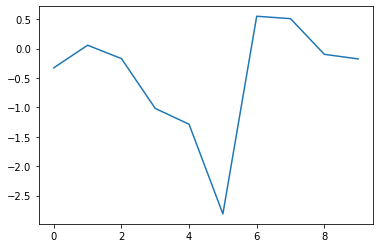

In [6]:
s.plot()

In [ ]:
np.info(np.random.gamma)

In [33]:
df = DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
df.cumsum()

normal      gamma  poisson
0    1.852622   0.481173        0
1    1.066217   0.818247        1
2    0.181992   1.288141        2
3   -0.266359   2.249904        2
4    0.494544   2.974768        3
..        ...        ...      ...
95 -14.434638  83.480289       91
96 -14.300582  83.874576       93
97 -14.338437  83.964313       94
98 -12.408722  84.642714       94
99 -14.095140  84.895578       96

[100 rows x 3 columns]

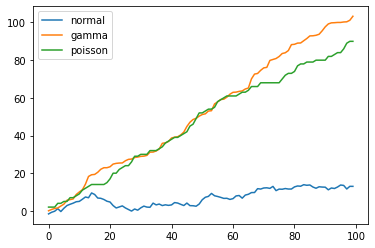

In [14]:
df.cumsum().plot()  #cumsum()是啥函数?

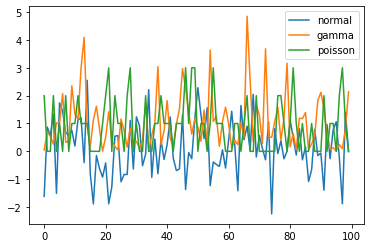

In [15]:
df.plot()

In [19]:
data = {
    'name':['张三', '李四', '王五', '小明', 'Peter'],
    'sex':['female', 'female', 'male', 'male','male'],
    'year':[2001, 2001, 2003, 2002, 2002],
    'city':['北京', '上海', '广州', '北京', '北京']
}
df = DataFrame(data)
df

name     sex  year city
0     张三  female  2001   北京
1     李四  female  2001   上海
2     王五    male  2003   广州
3     小明    male  2002   北京
4  Peter    male  2002   北京

In [17]:
df['sex'].value_counts()

male      3
female    2
Name: sex, dtype: int64

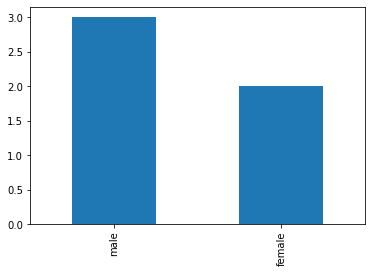

In [18]:
df['sex'].value_counts().plot(kind='bar')

In [ ]:
df['sex'].plot(kind='bar')

In [22]:
df['year'].plot(kind='bar')

In [31]:
df2 = DataFrame(np.random.randint(0,100,size=(3,3)),
               index=('one','two','three'),
               columns = ['A','B','C'])
df2

A   B   C
one    54  53  20
two    45  11  61
three  82   2  48

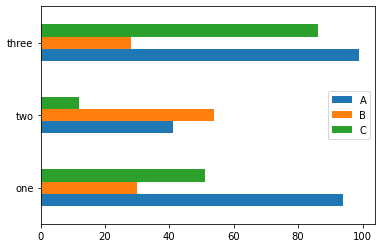

In [24]:
df2.plot(kind='barh')

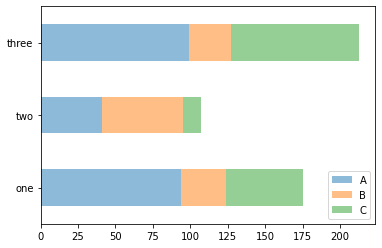

In [25]:
df2.plot(kind='barh',stacked=True,alpha=0.5)

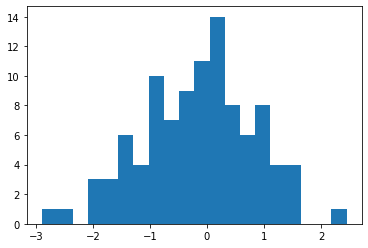

In [27]:
s = Series(np.random.normal(size=100))
s.hist(bins=20,grid=False)

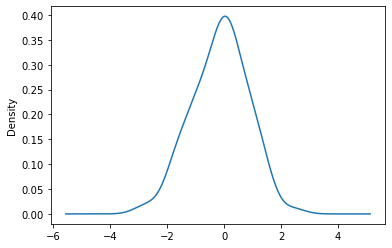

In [28]:
s.plot(kind='kde')

In [29]:
df3 = DataFrame(np.arange(10),columns=['X'])
df3['Y'] = 2 * df3['X'] + 5
df3

X   Y
0  0   5
1  1   7
2  2   9
3  3  11
4  4  13
5  5  15
6  6  17
7  7  19
8  8  21
9  9  23

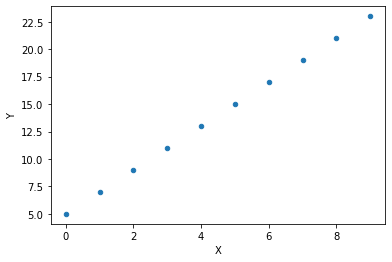

In [30]:
 df3.plot(kind='scatter',x='X',y='Y')

In [51]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns   #导入seaborn库

In [52]:
tips=sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [54]:
tips.shape

(244, 7)

In [55]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [56]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


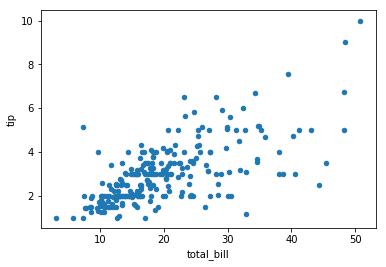

In [57]:
 tips.plot(kind='scatter',x='total_bill',y='tip')

In [62]:
male_tip = tips[tips['sex'] == 'Male']['tip'].mean()
male_tip

3.0896178343949052

In [63]:
female_tip = tips[tips['sex'] == 'Female']['tip'].mean()
female_tip

2.833448275862069

In [66]:
s = Series([male_tip,female_tip],index=['male','female'])
s

male      3.089618
female    2.833448
dtype: float64

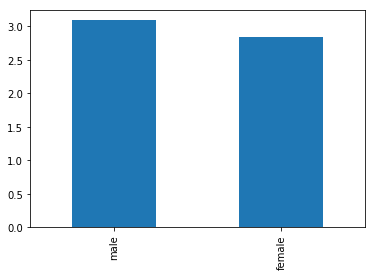

In [67]:
s.plot(kind='bar')

In [68]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [71]:
sun_tip = tips[tips['day'] == 'Sun']['tip'].mean()
sat_tip = tips[tips['day'] == 'Sat']['tip'].mean()
thur_tip = tips[tips['day'] == 'Thur']['tip'].mean()
fri_tip = tips[tips['day'] == 'Fri']['tip'].mean()

In [72]:
s = Series([thur_tip,fri_tip,sat_tip,sun_tip],index=['Thur','Fri','Sat','Sun'])
s

Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
dtype: float64

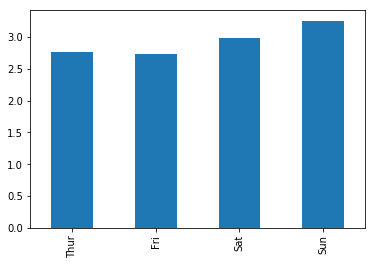

In [73]:
s.plot(kind='bar')

In [74]:
tips['percent_tip'] = tips['tip']/(tips['total_bill']+tips['tip'])
tips.head(10)

total_bill   tip     sex smoker  day    time  size  percent_tip
0       16.99  1.01  Female     No  Sun  Dinner     2     0.056111
1       10.34  1.66    Male     No  Sun  Dinner     3     0.138333
2       21.01  3.50    Male     No  Sun  Dinner     3     0.142799
3       23.68  3.31    Male     No  Sun  Dinner     2     0.122638
4       24.59  3.61  Female     No  Sun  Dinner     4     0.128014
5       25.29  4.71    Male     No  Sun  Dinner     4     0.157000
6        8.77  2.00    Male     No  Sun  Dinner     2     0.185701
7       26.88  3.12    Male     No  Sun  Dinner     4     0.104000
8       15.04  1.96    Male     No  Sun  Dinner     2     0.115294
9       14.78  3.23    Male     No  Sun  Dinner     2     0.179345

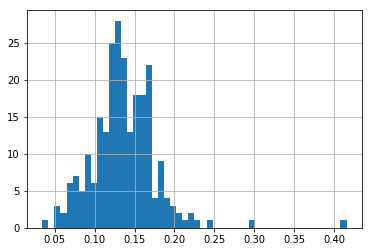

In [76]:
tips['percent_tip'].hist(bins=50)